# Imports

In [ ]:
import cv2
import math
import urllib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from PIL import Image

# Test Cases in the form of arrays

In [ ]:
correct_sodokus = []
# #Sodoku number 1
correct_sodokus.append([[8,0,0,0,0,0,0,4,0],
                  [0,0,3,6,0,0,0,0,0],
                  [0,7,0,0,9,0,2,0,3],
                  [0,5,0,0,0,7,0,0,0],
                  [0,0,0,0,4,5,7,0,0],
                  [2,0,0,1,0,0,0,3,0],
                  [5,0,1,0,0,0,0,6,8],
                  [0,0,8,5,0,0,0,1,0],
                  [0,9,0,0,0,8,4,0,0]])

#Sodoku number 2
correct_sodokus.append([[0,3,0,1,5,6,0,0,0],
                  [0,8,0,0,2,0,0,7,0],
                  [6,0,0,0,0,0,5,0,0],
                  [0,1,0,6,0,0,9,0,0],
                  [2,0,0,9,4,1,0,0,6],
                  [0,0,8,0,0,5,0,1,0],
                  [0,0,7,0,0,0,0,0,9],
                  [0,5,0,0,1,0,0,8,0],
                  [0,0,0,2,6,8,0,4,0]])

#Sodoku number 3
correct_sodokus.append([[0,2,0,5,0,0,1,0,6],
                  [0,1,8,4,0,0,0,0,7],
                  [5,7,3,6,0,0,9,0,0],
                  [0,3,1,9,7,0,2,0,5],
                  [0,0,5,0,8,6,0,0,0],
                  [0,9,6,0,0,0,8,1,4],
                  [0,0,0,0,0,0,4,0,9],
                  [1,6,0,0,0,9,0,7,0],
                  [0,0,0,8,0,0,0,0,1]])

#Sodoku number 4
correct_sodokus.append([[4,7,0,0,0,0,0,9,0],
                  [0,0,0,6,0,0,0,0,0],
                  [3,0,0,0,7,0,6,0,0],
                  [0,0,0,4,8,0,0,0,6],
                  [0,0,1,0,0,0,0,0,2],
                  [7,9,0,0,0,0,3,8,1],
                  [0,4,0,0,0,2,0,0,0],
                  [9,3,0,7,1,6,5,4,0],
                  [0,5,0,0,3,4,0,1,0]])

#Sodoku number 5
correct_sodokus.append([[8,0,6,0,0,3,0,9,0],
                  [0,4,0,0,1,0,0,6,8],
                  [2,0,0,8,7,0,0,0,5],
                  [1,0,8,0,0,5,0,2,0],
                  [0,3,0,1,0,0,0,5,0],
                  [7,0,5,0,3,0,9,0,0],
                  [0,2,1,0,0,7,0,4,0],
                  [6,0,0,0,2,0,8,0,0],
                  [0,8,7,6,0,4,0,0,3]])

#Sodoku number 6
correct_sodokus.append([[7,0,1,3,0,9,0,0,5],
                  [0,0,0,0,0,1,6,0,4],
                  [5,0,4,0,0,0,7,0,0],
                  [0,0,0,0,0,0,0,1,0],
                  [8,0,7,6,0,4,9,0,0],
                  [0,1,0,5,0,0,3,0,6],
                  [9,0,3,0,6,5,0,8,7],
                  [0,5,0,0,0,0,1,0,0],
                  [0,0,0,8,3,0,0,0,9]])

#Sodoku number 7
correct_sodokus.append([[2,0,0,3,0,6,0,0,0],
                  [6,0,5,9,0,0,4,0,8],
                  [0,0,0,0,0,0,5,0,2],
                  [4,0,9,0,6,3,0,0,0],
                  [0,0,0,8,0,0,7,0,1],
                  [0,0,1,0,4,0,0,9,0],
                  [1,0,6,2,7,0,0,0,0],
                  [0,2,0,0,0,0,8,0,4],
                  [0,0,4,0,1,8,0,0,7]])

#Sodoku number 8
correct_sodokus.append([[4,0,0,0,9,0,8,0,6],
                  [0,0,0,0,0,8,0,0,0],
                  [3,0,0,7,0,0,0,0,9],
                  [9,0,4,0,0,0,0,0,0],
                  [0,0,0,0,3,0,0,1,0],
                  [5,0,1,0,0,2,0,0,3],
                  [0,1,0,8,0,0,0,0,0],
                  [0,0,0,0,0,7,0,5,1],
                  [2,0,5,0,1,0,3,0,7]])

#Sodoku number 9
correct_sodokus.append([[0,2,8,3,0,0,0,6,0],
                  [3,0,0,0,0,0,2,0,9],
                  [0,1,0,0,0,2,0,0,3],
                  [0,0,3,0,1,0,0,0,8],
                  [0,0,0,5,0,9,0,0,0],
                  [5,0,0,0,3,0,9,9,0],
                  [2,0,0,1,0,0,0,0,0],
                  [9,0,1,0,0,0,0,0,6],
                  [0,4,0,0,0,5,3,7,0]])

#Sodoku number 10
correct_sodokus.append([[0,0,0,4,0,2,0,0,0],
                  [7,1,0,0,3,0,0,4,6],
                  [4,0,8,0,7,0,5,0,9],
                  [2,0,0,8,0,9,0,0,5],
                  [0,8,0,0,0,0,0,9,0],
                  [9,0,0,6,0,3,0,0,2],
                  [8,0,7,0,6,0,3,0,4],
                  [6,5,0,0,9,0,0,1,7],
                  [0,0,0,0,5,0,0,0,0]])

#Sodoku number 11
correct_sodokus.append([[0,1,7,0,0,0,3,5,0],
                  [2,0,0,1,0,9,0,0,8],
                  [5,0,0,0,7,0,0,0,2],
                  [0,7,0,0,4,0,0,8,0],
                  [0,0,5,6,0,8,4,0,0],
                  [0,4,0,0,9,0,0,1,0],
                  [7,0,0,0,6,0,0,0,4],
                  [1,0,0,4,0,7,0,0,6],
                  [0,6,3,0,0,0,8,7,0]])

#Sodoku number 12
correct_sodokus.append([[0,0,5,0,0,0,6,0,0],
                  [0,0,0,6,0,4,0,0,0],
                  [6,7,0,0,1,0,0,4,3],
                  [4,0,6,0,8,0,3,0,2],
                  [2,0,0,4,7,3,0,0,6],
                  [0,5,3,0,9,0,4,8,0],
                  [3,0,0,5,4,2,0,0,9],
                  [9,0,4,0,6,0,2,0,5],
                  [5,2,0,0,0,0,0,6,4]])

#Sodoku number 13
correct_sodokus.append([[0,0,0,4,0,8,0,0,0],
                  [0,6,0,0,7,0,0,1,0],
                  [7,0,2,0,9,0,5,0,4],
                  [0,9,0,7,0,4,0,3,0],
                  [0,0,0,0,5,0,8,0,0],
                  [0,8,0,9,0,6,0,5,0],
                  [9,0,0,0,1,0,7,0,8],
                  [0,7,0,0,6,0,0,4,0],
                  [0,0,0,2,0,7,0,0,0]])

#Sodoku number 14
correct_sodokus.append([[0,0,0,8,0,0,0,0,9],
                  [0,1,9,0,0,5,8,3,0],
                  [0,4,3,0,1,0,0,0,7],
                  [4,0,0,1,5,0,0,0,3],
                  [0,0,2,7,0,4,0,1,0],
                  [0,8,0,0,9,0,6,0,0],
                  [0,7,0,0,0,6,3,0,0],
                  [0,3,0,0,7,0,0,8,0],
                  [9,0,4,5,0,0,0,0,1]])

#Sodoku number 15
correct_sodokus.append([[0,0,0,0,8,0,0,0,9],
                  [0,5,0,6,0,1,0,2,0],
                  [0,0,0,5,0,3,0,0,0],
                  [0,9,6,1,0,4,8,3,0],
                  [0,0,0,0,6,0,0,0,5],
                  [0,1,5,9,0,8,4,6,0],
                  [0,0,0,7,0,5,0,0,0],
                  [0,8,0,3,0,9,0,7,0],
                  [0,0,0,0,1,0,0,0,3]])

#Sodoku number 16
correct_sodokus.append([[2,0,0,0,0,0,4,0,0],
                  [7,0,0,0,9,0,0,0,0],
                  [0,3,0,0,5,6,0,0,2],
                  [0,7,0,2,1,8,5,0,6],
                  [1,0,2,0,0,5,9,3,0],
                  [0,6,0,0,0,9,0,0,0],
                  [6,0,0,0,8,0,0,0,0],
                  [9,0,0,5,0,3,8,0,0],
                  [4,1,8,0,2,0,0,6,5]])

# Load Images

In [ ]:
imgs = []
imgs.append(cv2.imread('01.jpg')) #93%
imgs.append(cv2.imread('02.jpg')) #86%
imgs.append(cv2.imread('03.jpg')) #1000000000%
imgs.append(cv2.imread('04.jpg')) #74%
imgs.append(cv2.imread('05.jpg')) #80%
imgs.append(cv2.imread('06.jpg')) #75%
imgs.append(cv2.imread('07.jpg')) #79%
imgs.append(cv2.imread('08.jpg')) #69%
imgs.append(cv2.imread('09.jpg')) #83%
imgs.append(cv2.imread('10.jpg')) #60%
imgs.append(cv2.imread('11.jpg')) #73%
imgs.append(cv2.imread('12.jpg')) #62%
imgs.append(cv2.imread('13.jpg')) #84%
imgs.append(cv2.imread('14.jpg')) #59%
imgs.append(cv2.imread('15.jpg')) #82%
imgs.append(cv2.imread('16.jpg')) #57%

# Choose the test case

In [ ]:
testCaseNumber = input("Choose the test case: ")

img = imgs[int(testCaseNumber)-1]
correct_sodoku = correct_sodokus[int(testCaseNumber)-1]

Choose the test case: 1


# View the chosen test case

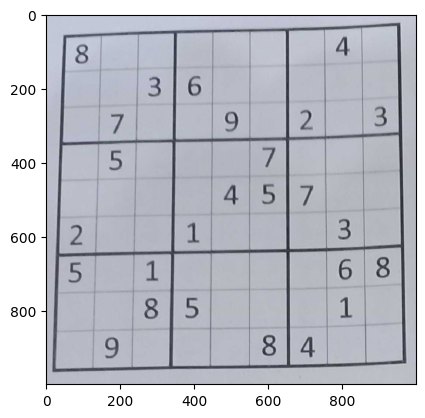

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Calculate the histogram average value
hist_average = np.average(img_rgb)

# Check if the histogram average value is less than 50
if hist_average < 50:
    # Adjust the brightness by increasing the pixel values
    brightness_factor = 5.5  # You can adjust this factor to control the brightness
    img_rgb = np.clip(img_rgb * brightness_factor, 0, 255).astype(np.uint8)

plt.imshow(img_rgb);

# For images with missing lines
Test Case 15 for example


In [ ]:
if (int(testCaseNumber) == 15):
  # Create a missing mask (you may adjust the threshold based on your requirements)
  missing_mask = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),200, 255, cv2.THRESH_BINARY_INV)[1]

  # Use inpaint function to complete the missing lines
  inpainted_img = cv2.inpaint(img_rgb, missing_mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

  # Now you can proceed with contour detection on the inpainted image
  gray = cv2.cvtColor(inpainted_img, cv2.COLOR_RGB2GRAY)
  contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Draw contours on the original image
  cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 2)  # Draw contours in green

  # Display the result
  plt.imshow(img_rgb)
  plt.show()

# Convert to grayscale
We don't need any color information.

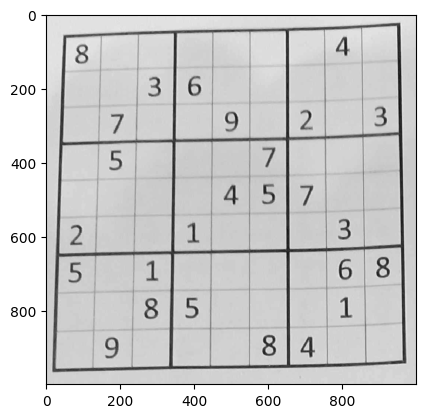

In [ ]:
# def compute_contrast(img_rgb):
#     gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
#     contrast = np.std(gray)
#     return contrast
# def sharpen_image(img_gray):
#     img_blurred = cv2.GaussianBlur(img_gray, (0, 0), 1.5)
#     img_gray = cv2.addWeighted(img_gray, 2.5, img_blurred, 3, 2)
#     return img_gray
# contrast = compute_contrast(img_rgb)
# print(contrast)
# # Adjust this threshold based on your observation
# contrast_threshold = 50

# # Check if the image needs sharpening
# if contrast < contrast_threshold:
#     img_gray = sharpen_image(img_rgb)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# # Ensure the image dimensions are power of 2 for efficient FFT
# rows, cols = img_gray.shape
# new_rows = cv2.getOptimalDFTSize(rows)
# new_cols = cv2.getOptimalDFTSize(cols)
# padded = cv2.copyMakeBorder(img_gray, 0, new_rows - rows, 0, new_cols - cols, cv2.BORDER_CONSTANT, value=0)

# # Perform the Fourier Transform
# dft = cv2.dft(np.float32(padded), flags=cv2.DFT_COMPLEX_OUTPUT)

# # Shift the zero frequency component to the center
# dft_shift = np.fft.fftshift(dft)

# # Calculate the magnitude spectrum (logarithmic scale)
# magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# # Display the original image and its Fourier Transform
# kernel_size = 5
# kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

# # Apply the low-pass filter using cv2.filter2D
# low_pass_img = cv2.filter2D(magnitude_spectrum, -1, kernel)

# # Apply inverse DFT
# idft = cv2.idft(low_pass_img, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
# idft = np.uint8(idft)
plt.imshow(img_gray, cmap="gray");

Length: 1000
Width: 1000


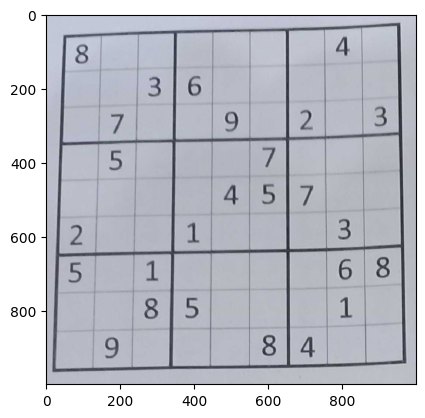

In [ ]:
# # Create a missing mask (you may adjust the threshold based on your requirements)
# missing_mask = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),200, 255, cv2.THRESH_BINARY_INV)[1]

# # Use inpaint function to complete the missing lines
# inpainted_img = cv2.inpaint(img_rgb, missing_mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# # Now you can proceed with contour detection on the inpainted image
# gray = cv2.cvtColor(inpainted_img, cv2.COLOR_RGB2GRAY)
# contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Draw contours on the original image
# cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 2)  # Draw contours in green

# # Display the result
# plt.imshow(img_rgb)
# plt.show()
# Find contours in the original image
contours, _ = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour
max_contour = max(contours, key=cv2.contourArea)

# Get the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(max_contour)

length = max(w, h)
width = min(w, h)

# Print or use the length and width values as needed
print("Length:", length)
print("Width:", width)

# Check if the width is smaller than the height
if (length == 964)  and (width == 928):
    # Create a missing mask (you may adjust the threshold based on your requirements)
    missing_mask = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),200, 255, cv2.THRESH_BINARY_INV)[1]

    # Use inpaint function to complete the missing lines
    inpainted_img = cv2.inpaint(img_rgb, missing_mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    # Now you can proceed with contour detection on the inpainted image
    gray = cv2.cvtColor(inpainted_img, cv2.COLOR_RGB2GRAY)
    contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 2)  # Draw contours in green

    print('hi i hate my life')

# Display the result
plt.imshow(img_rgb)
plt.show()

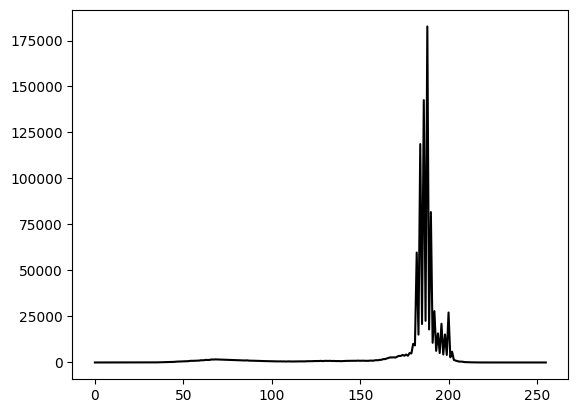

In [ ]:
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
plt.plot(hist, color='black')

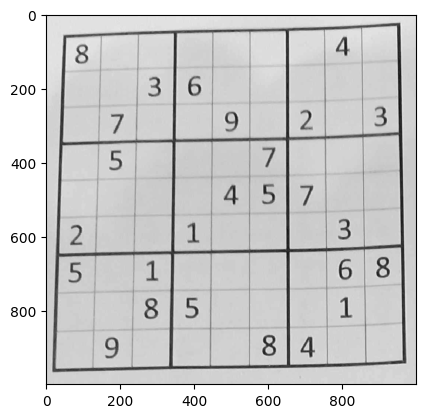

In [ ]:
#img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
# img_gray = cv2.addWeighted(img_gray, 1.2, np.zeros_like(img_gray), 0, 0.7)
# img_gray = cv2.blur(img_gray, (5,5))
# img_gray = cv2.bitwise_not(img_gray)
# img_gray = cv2.dilate(img_gray, np.ones((20, 20), np.uint8)  , iterations=1)
# img_gray = cv2.erode(img_gray, np.ones((20, 20), np.uint8)  , iterations=1)
# img_gray = cv2.bitwise_not(img_gray)

plt.imshow(img_gray, cmap="gray");

# Contour
We used contours to crop the picture to include only the grid of the sudoku

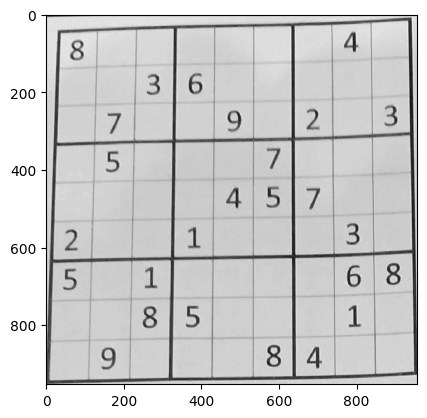

In [ ]:
thresh = cv2.adaptiveThreshold(img_gray,255,0,1,19,2)

contour,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros((img_gray.shape) , np.uint8)
maxarea=0
bestcount = None
for cnt in contour:
  area = cv2.contourArea(cnt)
  if area > 1000:
    if area > maxarea:
      maxarea = area
      bestcount = cnt
# Assuming you want the inner pixels of the largest contour
largest_contour = max(contour, key=cv2.contourArea)

# Get the bounding box of the contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Extract the region of interest (ROI) within the bounding box
img_gray = img_gray[y:y+h, x:x+w]
img_gray = cv2.copyMakeBorder(img_gray,  8, 0, 0, 0, cv2.BORDER_WRAP)

# Display the inner pixels
plt.imshow(img_gray, cmap="gray")
plt.show()
# cv2.drawContours(mask,[bestcount],0,255,-1)
# cv2.drawContours(mask,[bestcount],0,0,2)
# img_gray= cv2.bitwise_and(img_gray,mask)
# plt.imshow(img_gray, cmap="gray");



# Thresholding
We used adaptive thresholding as it deals better with darker areas caused by shadows

175.90329170052004


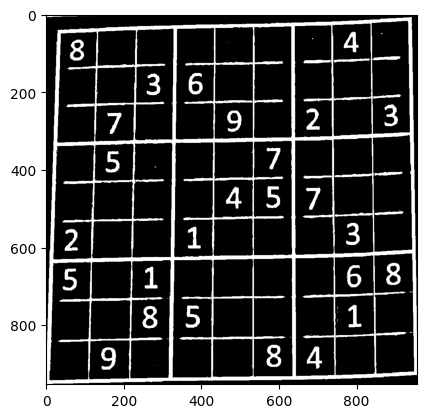

In [ ]:
def AdaptiveThresh(img_gray):
  img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
  maxValue=255,
  adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
  thresholdType=cv2.THRESH_BINARY_INV,
    blockSize = 51,
    C=5
  )
  return img_gray_threshed
#img_gray_threshed=AdaptiveThresh(img_gray)

# print(img_gray.shape[0]/2)
# median_value = np.median(img_gray)
# retval,img_gray_threshed = cv2.threshold(img_gray, median_value, 255, cv2.THRESH_BINARY_INV)
# _, img_gray_threshed = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#img_gray_threshed = cv2.medianBlur(img_gray_threshed, 5)
#kernel = np.ones((2, 2), np.uint8)

# # Perform morphological opening
#img_gray_threshed_warped = cv2.morphologyEx(img_gray_threshed_warped, cv2.MORPH_OPEN, kernel)

#_, img_gray_threshed_warped = cv2.threshold(img_gray_threshed_warped, 127, 255, cv2.THRESH_BINARY)


avg_pixel_value = np.mean(img_gray)
if(avg_pixel_value <120):
  img_gray = cv2.bitwise_not(img_gray)
img_gray_threshed=AdaptiveThresh(img_gray)
# img_gray_threshed = cv2.medianBlur(img_gray_threshed, 7)
#img_gray_threshed = cv2.erode(img_gray_threshed, kernel, iterations=1)
print(avg_pixel_value)
plt.imshow(img_gray_threshed, cmap="gray")

# Line detection
We used `HoughLinesP` as it deals better with imperfectly straight lines

[[635 941 635  22]]


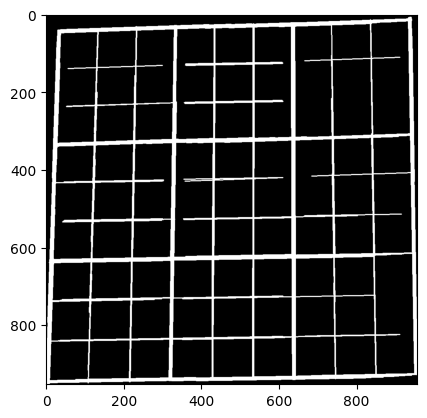

In [ ]:
# Detect lines that are not smaller in length than:
minLineLength = min(img_gray_threshed.shape[0],img_gray_threshed.shape[1])/4

lines = cv2.HoughLinesP(
    image=img_gray_threshed,
    rho=1,
    theta=np.pi/180 ,
    threshold=180,
    minLineLength=minLineLength,
    maxLineGap=19
)
# img_gray_threshed = cv2.cvtColor(img_gray_threshed, cv2.COLOR_GRAY2BGR)
# lines = cv2.HoughLines(
#     image=img_gray_threshed,
#     rho=1,  # Distance resolution of the accumulator in pixels.
#     theta=math.pi / 180,  # Angle resolution of the accumulator in radians.
#     threshold=250,  # Voting threshold for accumulator.
#     lines=None,
#     min_theta=0,  # Minimum angle to check for lines in radians.
#     max_theta=math.pi  # Maximum angle to check for lines in radians.
# )
print(lines[0])
#lines = cv2.Canny(img_gray_threshed , 100,200)

# for rho, theta in lines[:,0]:
#     # Mapping from polar (rho, theta) to cartesian (x0, y0)
#     x0 = math.cos(theta) * rho
#     y0 = math.sin(theta) * rho
#     # Create an extension to the points
#     pt1 = (int(x0 + 2000*(-math.sin(theta))), int(y0 + 2000*(math.cos(theta))))
#     pt2 = (int(x0 - 2000*(-math.sin(theta))), int(y0 - 2000*(math.cos(theta))))
#     cv2.line(img_gray_threshed, pt1, pt2, (255,0,0), 1, cv2.LINE_AA)

tmp_img = np.zeros_like(img_gray_threshed, dtype = np.uint8)
# plt.figure(figsize=(12, 8))
# plt.imshow(img_gray_threshed);
for x1, y1, x2, y2 in lines[:,0]: cv2.line(tmp_img,(x1,y1),(x2,y2),(255,0,0),2)
plt.imshow(tmp_img, cmap='gray')


# Find the intersections between the lines

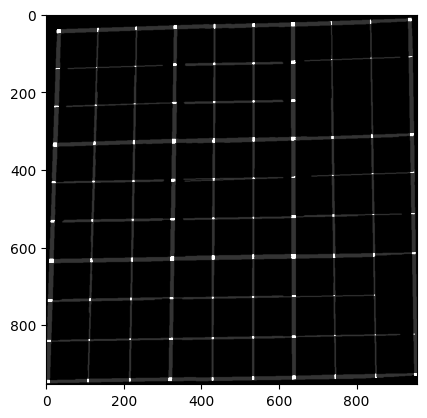

In [ ]:
tmp_img2 = np.zeros_like(img_gray_threshed, dtype = np.uint16)

def angle_between_lines(line1, line2):
    l1x1, l1y1, l1x2, l1y2 = line1
    l2x1, l2y1, l2x2, l2y2 = line2
    a1 = np.rad2deg(np.arctan2(l1y2 - l1y1, l1x2 - l1x1))
    a2 = np.rad2deg(np.arctan2(l2y2 - l2y1, l2x2 - l2x1))
    return np.abs(a1 - a2)

def intersection_point(line1, line2):
    # https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection
    l1x1, l1y1, l1x2, l1y2 = line1
    l2x1, l2y1, l2x2, l2y2 = line2
    nx = (l1x1*l1y2-l1y1*l1x2)*(l2x1-l2x2)-(l2x1*l2y2-l2y1*l2x2)*(l1x1-l1x2)
    ny = (l1x1*l1y2-l1y1*l1x2)*(l2y1-l2y2)-(l2x1*l2y2-l2y1*l2x2)*(l1y1-l1y2)
    d = (l1x1-l1x2)*(l2y1-l2y2)-(l1y1-l1y2)*(l2x1-l2x2)
    px = int(nx / d)
    py = int(ny / d)
    return (px, py)

def point_on_line(point, line):
    def distance(pfrom, pto): return np.sqrt((pfrom[0] - pto[0])**2 + (pfrom[1] - pto[1])**2)
    diff = distance(point, line[0:2]) + distance(point, line[2:4]) - distance(line[0:2], line[2:4])
    return np.abs(diff) < 75

intersections = []
num_of_lines = len(lines[:, 0])
image_height, image_width = tmp_img2.shape

for i in range(num_of_lines):
    for j in range(i + 1, num_of_lines):
        line1 = lines[i, 0]
        line2 = lines[j, 0]
        if (line1 is line2):
            continue
        a = angle_between_lines(line1, line2)
        if (a < 80 or a > 100):
            continue
        p = intersection_point(line1, line2)

        # Check if the intersection point is within the valid image range
        if 0 <= p[0] < image_width and 0 <= p[1] < image_height:
            if point_on_line(p, line1) and point_on_line(p, line2):
                tmp_img2[p[::-1]] = 5000
                intersections.append(p[::-1])

plt.imshow(tmp_img2 + tmp_img, cmap="gray", vmin=0, vmax=1255)

# Take the outermost intersection points
After croping to the contour, the outermost intersection points are the corners of our sudoku =)

In [ ]:
p1 = sorted(intersections, key = lambda p: p[0] + p[1])[0] # topleft
p2 = sorted(intersections, key = lambda p: p[0] - p[1])[0] # topright
p3 = sorted(intersections, key = lambda p: p[0] + p[1])[-1] # bottright
p4 = sorted(intersections, key = lambda p: p[1] - p[0])[0] # bottleft

# img = img_gray[min(p1[0],p2[0])-10:max(p3[0],p4[0])+10,min(p1[1],p4[1])-10:max(p2[1],p3[1])+10]
# new_p1 = (p1[0] - min(p1[0], p2[0])+10, p1[1] - min(p1[1], p4[1])+10)
# new_p2 = (p2[0] - min(p1[0], p2[0])+10, p2[1] - min(p1[1], p4[1])+10)
# new_p3 = (p3[0] - min(p1[0], p2[0])+10, p3[1] - min(p1[1], p4[1])+10)
# new_p4 = (p4[0] - min(p1[0], p2[0])+10, p4[1] - min(p1[1], p4[1])+10)
# print(p1)
# print(p2)
# print(p3)
# print(p4)
# plt.imshow(img_gray, cmap="gray");
   # Find contours in the edged image
#contours, _ = cv2.findContours(img_gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Filter contours based on aspect ratio and area
# filtered_contours = []
# for contour in contours:
#    epsilon = 0.02 * cv2.arcLength(contour, True)
#    approx = cv2.approxPolyDP(contour, epsilon, True)
#    if len(approx) == 4 and cv2.isContourConvex(approx):
#     filtered_contours.append(approx)
#largest_contour = max(contours, key=cv2.contourArea)
#epsilon = 0.02 * cv2.arcLength(largest_contour, True)
#approx = cv2.approxPolyDP(largest_contour, epsilon, True)

    # Draw the contours on the original image
# Draw the filtered contours on the original image
#cv2.drawContours(img_gray, filtered_contours, -1, (0, 255, 0), 2)
# Display the result
#plt.imshow(img_gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
#cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)
#plt.imshow(img, cmap="gray", vmax=1000)
# coords = np.int32([[p1[::-1], p2[::-1], p3[::-1], p4[::-1]]])
# tmp_img3 = np.zeros_like(img_gray_threshed, dtype = np.int32)
# tmp_img3 = cv2.polylines(tmp_img3, coords, isClosed=True, color=(2550,0,0))
# plt.imshow(tmp_img3 + tmp_img, cmap="gray", vmax=1000);

# Perspective transform

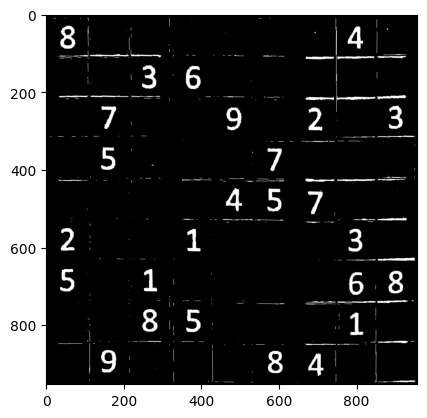

In [ ]:
img_gray_threshed = img_gray_threshed - tmp_img
y, x = img_gray_threshed.shape
src_coords = np.float32([[0,0], [x,0], [x,y], [0,y]])
dst_coords = np.float32([[p1[::-1], p2[::-1], p3[::-1], p4[::-1]]])
img_gray_threshed_warped = cv2.warpPerspective(
    src=img_gray_threshed,
    M=cv2.getPerspectiveTransform(dst_coords, src_coords),
    dsize=img_gray_threshed.shape[::-1]
)
plt.imshow(img_gray_threshed_warped, cmap="gray");

# Separate the number tiles and crop the tiles to the charecters inside

<ipython-input-334-a60b2321fb09>:57: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  col.imshow(cropped_number_tiles[i][j], cmap="gray")


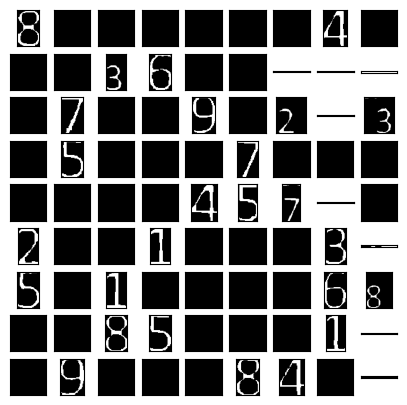

In [ ]:
kernel = np.ones((5, 5), np.uint8)

# # Perform morphological opening
#img_gray_threshed_warped = cv2.morphologyEx(img_gray_threshed_warped, cv2.MORPH_OPEN, kernel)

_, img_gray_threshed_warped = cv2.threshold(img_gray_threshed_warped, 127, 255, cv2.THRESH_BINARY)

img_gray_threshed_warped = cv2.erode(img_gray_threshed_warped, kernel, iterations=1)


def find_leftmost(array):
    for col_idx in range(len(array[0])):
        for row_idx, row in enumerate(array):
            if row[col_idx] == 255:  # Assuming 1 represents white
                return row_idx, col_idx
    return 0, 0

def find_rightmost(array):
    for col_idx in range(len(array[0]) - 1, -1, -1):  # Iterate in reverse order
        for row_idx, row in enumerate(array):
            if row[col_idx] == 255:  # Assuming 1 represents white
                return row_idx, col_idx
    return 0, 20

def find_topmost(array):
    for row_idx, row in enumerate(array):
        for col_idx in range(len(row)):
            if row[col_idx] == 255:  # Assuming 1 represents white
                return row_idx, col_idx
    return 0, 0

def find_bottommost(array):
    for row_idx in range(len(array) - 1, -1, -1):  # Iterate in reverse order
        for col_idx in range(len(array[row_idx])):
            if array[row_idx][col_idx] == 255:  # Assuming 1 represents white
                return row_idx, col_idx
    return 20, 0


cropped_number_tiles = []
M = img_gray_threshed_warped.shape[0] // 9
N = img_gray_threshed_warped.shape[1] // 9

for i in range(9):
    cropped_number_tiles.append([])
    for j in range(9):
        tile = img_gray_threshed_warped[i * M:(i + 1) * M, j * N:(j + 1) * N]
        left, right = find_leftmost(tile)[1], find_rightmost(tile)[1]
        top, bottom = find_topmost(tile)[0], find_bottommost(tile)[0]
        cropped_tile = tile[top:bottom, left:right]
        cropped_number_tiles[i].append(cropped_tile)

# Plot the cropped tiles
_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(cropped_number_tiles[i][j], cmap="gray")
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)

plt.show()



# Load the 2 sets of structuring elements

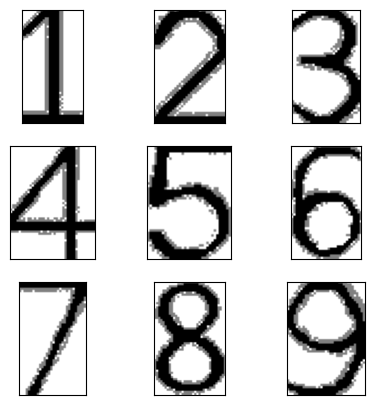

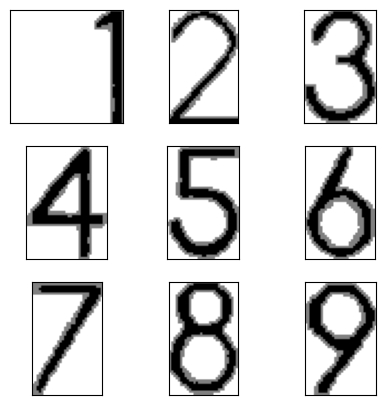

In [ ]:
digit_ses = []
for i in range(9):
    se = cv2.imread(f"{i+1}.jpg", cv2.IMREAD_GRAYSCALE)
    se_canvas = np.zeros_like(se, dtype = np.int16)
    se_canvas[se < 64] = 1
    se_canvas[se > 192] = -1
    digit_ses.append(se_canvas)
_, axes = plt.subplots(3, 3, figsize=(5, 5))

for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(digit_ses[i*3+j], cmap="gray", vmin=-1, vmax=1);
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)

digit_ses2 = []
for i in range(9):
    se2 = cv2.imread(f"{i+1}c.jpg", cv2.IMREAD_GRAYSCALE)
    se_canvas = np.zeros_like(se2, dtype = np.int16)
    se_canvas[se2 < 25] = 1
    se_canvas[se2 > 192] = -1
    digit_ses2.append(se_canvas)
_, axes = plt.subplots(3, 3, figsize=(5, 5))

for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(digit_ses2[i*3+j], cmap="gray", vmin=-1, vmax=1);
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)


In [ ]:
# tiles = [cv2.threshold(number_tiles[t//9][t%9], 250, 255, cv2.THRESH_BINARY)[1] for t in range(9*9)]
# tiles = [np.uint8(tile) if tile is not None else np.zeros_like(number_tiles[0][0]) for tile in tiles]
# _, axes = plt.subplots(9, 9, figsize=(5, 5))
# for i, row in enumerate(axes):
#     for j, col in enumerate(row):
#         col.imshow(tiles[i*9 + j], cmap="gray");
#         col.get_xaxis().set_visible(False)
#         col.get_yaxis().set_visible(False)

# Definition of some methods
These methods include:
- `se_match` : matches the structuring elemnts to a given cell
- `textize_sudoku` : takes an array and returns a formatted string to print

In [ ]:
# This method will tell me if the digit exists in the image or not
# But it won't tell me where; if exists
# def match_binary_images(template, target):
#     # Perform hit and miss using matchTemplate
#     result = cv2.matchTemplate(target.astype(np.uint8), template.astype(np.uint8), cv2.TM_CCOEFF_NORMED)

#     weight_map = np.ones_like(result)
#     weight_map[result < 0] = 1  # Assign black_weight to black matches
#     weight_map[result >= 0] = 4  # Assign white_weight to white matches

#     # Apply the weight map to the result
#     result_weighted = result * weight_map


#     # Find the location of the best match
#     _, max_val, _, _ = cv2.minMaxLoc(result_weighted)

#     # Calculate the matching confidence percentage
#     confidence_percentage = max_val * 100

#     return confidence_percentage
# def centralize_white_pixels(image):
#     # Find the coordinates of white pixels
#     white_pixel_coordinates = np.where(image == 255)

#     # Calculate the current center of mass
#     current_center = (
#         int(np.mean(white_pixel_coordinates[1])),
#         int(np.mean(white_pixel_coordinates[0]))
#     )

#     # Calculate the desired center (center of the image)
#     desired_center = (image.shape[1] // 2, image.shape[0] // 2)

#     # Calculate the translation vector
#     translation_vector = (
#         desired_center[0] - current_center[0],
#         desired_center[1] - current_center[1]
#     )

#     # Create a translation matrix
#     translation_matrix = np.float32([[1, 0, translation_vector[0]], [0, 1, translation_vector[1]]])

#     # Apply translation to move white pixels
#     centralized_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]), borderMode=cv2.BORDER_CONSTANT, borderValue=0)

#     return centralized_image
def se_match(se, se2, image):
    se_height, se_width = se.shape
    MAX_SCORE = np.sum(se == 1) * 8  # Total number of value=1 pixels
    MAX_SCORE2 = np.sum(se2 == 1) * 8  # Total number of value=1 pixels
    score = np.sum(( image == 255) & (se == 1)) * 4.5
    score -= np.sum((image == 0) & (se == -1)) * 1
    score2 = np.sum(( image == 255) & (se2 == 1)) * 4.5
    score2 -= np.sum((image == 0) & (se2 == -1)) * 1
    # Go over all windows in image and get the maximum score obtained
    # for y in range(image.shape[0] - se_height):
    #     for x in range(image.shape[1] - se_width):
    #         window = image[y:y+se_height, x:x+se_width]
    #         temp_score = np.sum((window == 255) & (se == 1)) * 4.5  # Higher weight on white-matches
    #         temp_score -= np.sum((window == 0) & (se == -1)) * 1
    #         score = max(score, temp_score)
    # return max(0, score/MAX_SCORE)
    return max((score/MAX_SCORE)*100, (score2/MAX_SCORE2)*100)
# def se_match(se, image):
#     score = cv2.bitwise_and(image.astype(np.uint8),se.astype(np.uint8))
#     score = np.sum(score)
#     print(score)
#     return score
# def se_match(se,image):
#   # hitmiss = cv2.morphologyEx(image ,cv2.MORPH_HITMISS, se)
#   # score = np.sum(hitmiss)/255
#   hitmiss = cv2.matchTemplate(image.astype(np.uint8),  se.astype(np.uint8), cv2.TM_CCORR_NORMED)
#   score = np.sum(hitmiss)/255
#   return score


#print(cropped_number_tiles[1].dtype)
#print(se_uint8.dtype)
def textize_sudoku(board):
    sudoku_ocr_text = ''
    for i, row in enumerate(board):
        sudoku_ocr_text += ' ├───────────┼───────────┼───────────┤ ' if (i%3 == 0) else ' │           │           │           │ '
        sudoku_ocr_text += '\n'
        sudoku_ocr_text += ' │ '
        for j, cell in enumerate(row): sudoku_ocr_text += f"{cell if cell != 0 else ' '} {' ' if (j%3 != 2) else '│'} "
        sudoku_ocr_text += '\n'
    sudoku_ocr_text += ' ├───────────┼───────────┼───────────┤ '
    return sudoku_ocr_text


# Matching the sudoku with the structuring elements and storing the largest confidence
- Here we call the `se_match` function for every cell and structuring elemnt combination
- The function returns maximum confidence between the 2 sent structuring elements (representing the same number from the 2 different sets)
- The return confidence is then stored in an array
- If the maximum value of confidence is below a certain threshold, it is considered to be empty
- else, for every cell we choose the highest confidence as the value of the cell
- we handle the similarity of the numbers 3 and 8 by having an extra structuring element representing their difference to distinguish between them

In [ ]:
# fig = plt.figure(figsize=(12, 4))
# gs = plt.GridSpec(5, 2)
# ax1 = fig.add_subplot(gs[:, 0])
# ax2 = fig.add_subplot(gs[1:4, 1])
sodoku = []
se3 = cv2.imread("8/3.jpg", cv2.IMREAD_GRAYSCALE)
se3_canvas = np.zeros_like(se, dtype = np.int16)
se3_canvas[se < 64] = 1
se3_canvas[se > 192] = -1
for i in range(9):
  row = []
  for j in range(9):
    tile = cropped_number_tiles[i][j]
    kernel_size = 5
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    tile = np.uint8(tile)
    conf = []
    for t in range(9):
      se = digit_ses[t]
      se2 = digit_ses2[t]
      # max_confidence = -100
      # max_confidence_se = None
      se = se + 2
      if tile.shape[0] > 20 and tile.shape[1] > 20:
        resized_se = cv2.resize(se,(tile.shape[1], tile.shape[0]), interpolation=cv2.INTER_NEAREST)
        resized_se2 = cv2.resize(se,(tile.shape[1], tile.shape[0]), interpolation=cv2.INTER_NEAREST)
        se = se - 2
        se2 = se2 - 2
        conf.append(se_match(resized_se, resized_se2, tile))
      else:
        conf.append(0)
    if (max(conf)<13.5):
      digit = 0
    else:
      digit = conf.index(max(conf)) + 1
      if (digit == 3 or digit == 8):
        resized_se3 = cv2.resize(se3_canvas,(tile.shape[1], tile.shape[0]), interpolation=cv2.INTER_NEAREST)
        if (se_match(resized_se3, resized_se3, tile) > 3):
          digit = 8
        else:
          digit = 3
    row.append(digit)
  sodoku.append(row)

hit = 0
for i in range(9):
  for j in range(9):
    if (sodoku[i][j]==correct_sodoku[i][j]):
      hit+=1
    else:
      print("Miss in cell " + str(i+1) + ", " + str(j+1))
      print("Should be " + str(correct_sodoku[i][j]) + " instead of " + str(sodoku[i][j]))
      print()

print("Number of Hits (maximum 81): ")
print(hit)
print("Hit rate: ")
print((hit/81)*100)
print()
# print(np.round(conf,2))
# print(digit)
# for row in sodoku:
#     for element in row:
#         print(element, end=' ')
#     print()
# ax1.imshow(tile, cmap="gray");
print(textize_sudoku(sodoku))

Miss in cell 2, 3
Should be 3 instead of 1

Miss in cell 2, 4
Should be 6 instead of 5

Miss in cell 3, 7
Should be 2 instead of 0

Miss in cell 3, 9
Should be 3 instead of 0

Miss in cell 5, 7
Should be 7 instead of 0

Miss in cell 7, 8
Should be 6 instead of 5

Miss in cell 7, 9
Should be 8 instead of 0

Miss in cell 8, 4
Should be 5 instead of 3

Number of Hits (maximum 81): 
73
Hit rate: 
90.12345679012346

 ├───────────┼───────────┼───────────┤ 
 │ 8         │           │     4     │ 
 │           │           │           │ 
 │         1 │ 5         │           │ 
 │           │           │           │ 
 │     7     │     9     │           │ 
 ├───────────┼───────────┼───────────┤ 
 │     5     │         7 │           │ 
 │           │           │           │ 
 │           │     4   5 │           │ 
 │           │           │           │ 
 │ 2         │ 1         │     3     │ 
 ├───────────┼───────────┼───────────┤ 
 │ 5       1 │           │     5     │ 
 │           │           

# Finally, the sudoku is solved and printed

In [ ]:
def solve_sudoku(board):
    empty = find_empty(board)

    # If there are no empty spaces, the puzzle is solved
    if not empty:
        return True

    row, col = empty

    # Try filling the empty space with numbers 1 to 9
    for num in range(1, 10):
        if is_valid(board, num, (row, col)):
            # If the number is valid, fill the empty space
            board[row][col] = num

            # Recursively attempt to solve the rest of the puzzle
            if solve_sudoku(board):
                return True

            # If the current configuration does not lead to a solution, backtrack
            board[row][col] = 0

    # No solution found for the current configuration
    return False

def find_empty(board):
    # Find the first empty space (cell with value 0)
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return (i, j)
    return None

def is_valid(board, num, pos):
    # Check if the number is not present in the same row, column, or 3x3 box
    for i in range(9):
        if board[pos[0]][i] == num or board[i][pos[1]] == num:
            return False

    box_start_row, box_start_col = 3 * (pos[0] // 3), 3 * (pos[1] // 3)
    for i in range(3):
        for j in range(3):
            if board[box_start_row + i][box_start_col + j] == num:
                return False

    return True


if solve_sudoku(sodoku):
    print(textize_sudoku(sodoku))
else:
    print("No solution exists.")

No solution exists.
